# Twitter Sentiment Analysis Project

This project deals with developing a Sentiment Analysis module and using it to graph twitter sentiments about a particular topic.

In [1]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
import random
from nltk.corpus import stopwords
from string import punctuation
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifier):
        self._classifiers = classifier
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self,features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes))
        conf = choice_votes/len(votes)
        
        return conf

In [3]:
short_pos = open(r'C:\Users\DELL\Desktop\positive.txt','r').read()
short_neg = open(r'C:\Users\DELL\Desktop\negative.txt','r').read()

documents = []
all_words = []

allowed_types = ['J']

for p in short_pos.split('\n'):
    documents.append((p,"pos"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    
    for w in pos:
        if w[1][0] in allowed_types:
            all_words.append(w[0].lower())
    
for p in short_neg.split('\n'):
    documents.append((p,"neg"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    
    for w in pos:
        if w[1][0] in allowed_types:
            all_words.append(w[0].lower())
    

stop_words = set(stopwords.words('english')+list(punctuation))
all_words_wo_stop = [ w for w in all_words if not w in stop_words]
all_words = all_words_wo_stop

all_words = nltk.FreqDist(all_words)

word_features = list()

for w in all_words.most_common(5000):
    word_features.append(w[0])  
    
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev,category) in documents]

random.shuffle(featuresets)

training_set = featuresets[:10000]
test_set = featuresets[10000:]

In [4]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print(" Original Naive Bayes Algo Acc. Per: ", (nltk.classify.accuracy(classifier, test_set))*100)

 Original Naive Bayes Algo Acc. Per:  72.89156626506023


In [5]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MN Naive Bayes Algo Acc. Per: ", (nltk.classify.accuracy(MNB_classifier, test_set))*100)

MN Naive Bayes Algo Acc. Per:  73.64457831325302


In [6]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("Bernoulli Naive Bayes Algo Acc. Per: ", (nltk.classify.accuracy(BernoulliNB_classifier, test_set))*100)

Bernoulli Naive Bayes Algo Acc. Per:  73.19277108433735


In [7]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression Algo Acc. Per: ", (nltk.classify.accuracy(LogisticRegression_classifier, test_set))*100)

LogisticRegression Algo Acc. Per:  71.83734939759037


In [8]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier Algo Acc. Per: ", (nltk.classify.accuracy(SGDClassifier_classifier, test_set))*100)

SGDClassifier Algo Acc. Per:  70.63253012048193


In [69]:
# SVC_classifier = SklearnClassifier(SVC())
# SVC_classifier.train(training_set)
# print("SVC Acc. Per: ", (nltk.classify.accuracy(SVC_classifier, test_set))*100)

In [9]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC Acc. Per: ", (nltk.classify.accuracy(LinearSVC_classifier, test_set))*100)

LinearSVC Acc. Per:  71.23493975903614


In [10]:
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC Acc. Per: ", (nltk.classify.accuracy(NuSVC_classifier, test_set))*100)

NuSVC Acc. Per:  72.28915662650603


In [11]:
voted_classifier = VoteClassifier(classifier,
                                  MNB_classifier,
                                  LinearSVC_classifier,
                                  NuSVC_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier,
                                  SGDClassifier_classifier)


print("Voted Classifier Per: ", (nltk.classify.accuracy(voted_classifier, test_set))*100)

print("Classification: ", voted_classifier.classify(test_set[0][0]), "Confidence %:", voted_classifier.confidence(test_set[0][0]))

Voted Classifier Per:  73.64457831325302
Classification:  neg Confidence %: 0.8571428571428571


In [12]:
def sentiment(text):
    
    feats = find_features(text)
    
    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

In [13]:
print(sentiment("This movie was pretty awesome and I liked it very much."))
print(sentiment("I didn't like this movie it was pretty boring"))

('pos', 1.0)
('neg', 1.0)


In [ ]:
ckey="qtowK3b9NY4nNBhO9C3k7IMDQ"
csecret="wTvJ2S8CFu91g65FNJM5vONVEIkkF3UnqRi6C0DaNR0hFCXWNI"
atoken="1151571836095696896-KhHNT2Wtit2eSJElIm8liVAXBugxX6"
asecret="kwhB7xpgTEUUFdcYqvP0OVXox6GzROhrOka96IUlBCxaH"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        
        tweet = ascii(all_data["text"])
        sentiment_value, confidence = sentiment(tweet)
        
        if(confidence*100 >= 80):
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()

        return True

    def on_error(self, status):
        print (status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["india"])

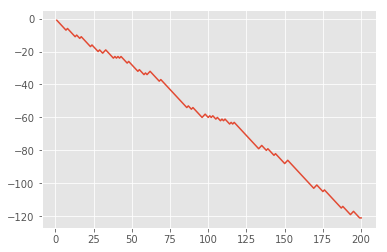

In [88]:
style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()